# Building A Handwritten Digits Classifier
## 1. Introduction

In this project, we explore the effectiveness of deep, feedforward neural networks at classifying images, by building a few models that can classify handwritten digits.
We work with the handwritten digits dataset from UCI, [http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).

In this project, we use a **Deep, Feedforward Neural Network**, even though, in practical applications, **Convolutional Neural Networks** are used for image classification.

The purpose of this project is threefold:
1. Explore image classification.
2. Observe the limitations of traditional ML models for image classification.
3. Train, test and improve a few different Deep Neural Networks (DNNs) for image classification.

## 2. Working with Image Data

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The load_digits() function returns a copy of the hand-written digits dataset from UCI.

In [2]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [3]:
data = digits['data']
images = digits['images']
target = digits['target']
target_names = digits['target_names']

Let's use matplotlib to visualize some of the images in the dataset.

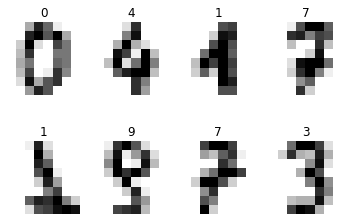

In [4]:
fig, ax = plt.subplots(2, 4)

first_row = [0, 100, 200, 300]
second_row = [1000, 1100, 1200, 1300]

i = 0
for n in first_row:
    ax[0,i].imshow(images[n], cmap='gray_r')
    ax[0,i].set_title(target[n])
    ax[0,i].axis('off')
    i += 1

i = 0
for n in second_row:
    ax[1,i].imshow(images[n], cmap='gray_r')
    ax[1,i].set_title(target[n])
    ax[1,i].axis('off')
    i += 1

plt.show() 

## 3. K-Nearest Neighbors Algorithm

Linear and logistic regressions both assume linearity between the features and the labels. By contrast, the **k-nearest neighbors algorithm** does not make such an assumption, so it can be used to capture nonlinearity in the data.
We use the k-nearest neighbors algorithm to compare every new observation in the test set to every observation in the training set to look for similar (i.e., the nearest) observations. Then, the algorithm finds the label with the most nearby observations and assigns that label as the prediction for the test data.

Since we are performing classification, we will use the accuracy classification score `accuracy_score` that we can find in `sklearn.metrics`.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

We prepare the data by converting the image pixel data `data` into a pandas `DataFrame`, and the numpy array `target` containing the labels into a `Series`. Then we shuffle both the dataframe and the series.

In [6]:
df = pd.DataFrame(data)
target_labels = pd.Series(target)

# Fix a random seed for reproducibility:
np.random.seed(1)
shuffled_index = np.random.permutation(df.index)
df = df.loc[shuffled_index]
target_labels = target_labels[shuffled_index]

We split the data set into two partitions:
- the training set containing the majority of the rows (75%);
- the test set containing the remaining rows (25%).

In [7]:
nb_rows = len(df)
threshold = round(nb_rows * .75)

train_df = df.iloc[0:threshold].copy()
test_df = df.iloc[threshold:].copy()
train_labels = target_labels[0:threshold]
test_labels = target_labels[threshold:]

We create a function `knn_train_test` that encapsulates the training and validation process, and returns an accuracy score.

In [8]:
def knn_train_test(train_df, train_labels, test_df, test_labels, k=5):
    # MS: Create an instance of the KNeighborsClassifier class
    # The default number of neighbors nb_neighbors is set to 5
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # MS: Fit the model on the training set
    knn.fit(train_df, train_labels)
    
    # MS: Make predictions on the target labels test_labels
    # to predict the digits for the images in test_df
    test_predictions = knn.predict(test_df)
    
    # MS: Calculate the accuracy classification score and return that value
    # MS: The true labels are in the test_labels series
    acs = accuracy_score(test_labels, test_predictions)
    
    return acs

We create, train, and test a univariate model using the `k` values from 1 to 20, and visualize the results using a line plot.

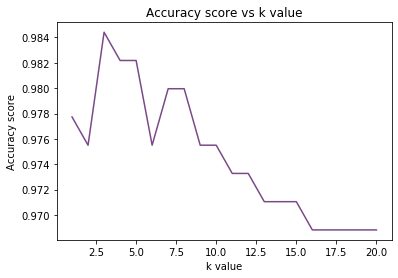

['0.9777', '0.9755', '0.9844', '0.9822', '0.9822', '0.9755', '0.9800', '0.9800', '0.9755', '0.9755', '0.9733', '0.9733', '0.9710', '0.9710', '0.9710', '0.9688', '0.9688', '0.9688', '0.9688', '0.9688']
Best accuracy score: 0.9844


In [9]:
k_values_array = list(range(1,21))
acs_array = []
for k_value in k_values_array:
    acs = knn_train_test(train_df, train_labels, test_df, test_labels, k=k_value)
    acs_array.append(acs)

plt.plot(k_values_array, acs_array, color='#7A4988')
plt.title('Accuracy score vs k value')
plt.xlabel('k value')
plt.ylabel('Accuracy score')
plt.show()

# Print the formatted list of accuracy scores, and the best accuracy score.
print(list(map(lambda x: "{:.4f}".format(x), acs_array)))
print("Best accuracy score:", "{:.4f}".format(np.max(acs_array)))

We observe that the best `k` value is 3, which corresponds to an accuracy score of 98.44%.

Now let's perform 4-fold cross validation, and experiment with different values for `k` and plot the resulting classification accuracies.

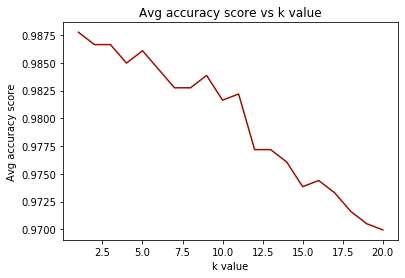

['0.9878', '0.9866', '0.9866', '0.9850', '0.9861', '0.9844', '0.9828', '0.9828', '0.9839', '0.9816', '0.9822', '0.9772', '0.9772', '0.9761', '0.9738', '0.9744', '0.9733', '0.9716', '0.9705', '0.9700']
Best accuracy score: 0.9878


In [10]:
# Perform 4-fold cross validation:
kf = KFold(n_splits=4, shuffle=True, random_state=1)

# Experiment with different values of k.
k_values_list = list(range(1,21))
avg_acs_list = []

for k_value in k_values_list:
    knn = KNeighborsClassifier(n_neighbors=k_value)
    # MS: Use the cross_val_score() function to perform k-fold cross-validation:
    # cv describes the number of folds (e.g., an instance of the KFold class)
    # scoring set to "accuracy" corresponds to the metrics.accuracy_score
    # (acs = accuracy classification score)
    acs = cross_val_score(knn, df, target_labels, scoring="accuracy", cv=kf)
    avg_acs = np.mean(acs)
    avg_acs_list.append(avg_acs)

# Plot the resulting classification accuracies.
plt.plot(k_values_list, avg_acs_list, color='#990F02')
plt.title('Avg accuracy score vs k value')
plt.xlabel('k value')
plt.ylabel('Avg accuracy score')
plt.show()

# Print the formatted list of average accuracy scores, and the best accuracy score.
print(list(map(lambda x: "{:.4f}".format(x), avg_acs_list)))
print("Best accuracy score:", "{:.4f}".format(np.max(avg_acs_list)))

It is evident that the best `k` value is 1, which corresponds to an average accuracy score of 98.78%.

There are some **drawbacks** in using the k-nearest neighbors algorithm:
- the memory usage is high, since for every new observation, we need to perform comparisons to the available observations;
- there is no model representation that we can be explored or used for debugging.

For these reasons, we are going to try a neural network with a single hidden layer, using the `MLPClassifier` class from scikit-learn.

## 4. Neural Network with Single Hidden Layer

We use 4-fold cross validation on a neural network with a single hidden layer, in which we are going to increase the number of neurons from 8 to 256. NB: It will take some time to run!

In [11]:
from sklearn.neural_network import MLPClassifier

def get_mlp_avg_acs_list(hidden_layer_neurons, kf):
    mlp_avg_acs_list = []
    for n in hidden_layer_neurons:
        print(n)
        mlp = MLPClassifier(hidden_layer_sizes=n, max_iter=200)
        acs = cross_val_score(mlp, df, target_labels, scoring="accuracy", cv=kf)
        mlp_avg_acs = np.mean(acs)
        mlp_avg_acs_list.append(mlp_avg_acs)
    return mlp_avg_acs_list

one_hl_neurons = [(8,), (16,), (32,), (64,), (128,), (256,)]

mlp_avg_acs_list = get_mlp_avg_acs_list(one_hl_neurons, kf)
x = [i[0] for i in one_hl_neurons]

(8,)


/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

(16,)


/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

(32,)


/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

(64,)
(128,)
(256,)


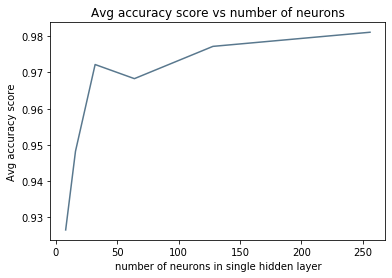

['0.9266', '0.9482', '0.9722', '0.9683', '0.9772', '0.9811']
Best accuracy score: 0.9811


In [12]:
# Plot the resulting classification accuracies.
plt.plot(x, mlp_avg_acs_list, color='#59788E')
plt.title('Avg accuracy score vs number of neurons')
plt.xlabel('number of neurons in single hidden layer')
plt.ylabel('Avg accuracy score')
plt.show()

# Print the formatted list of average accuracy scores, and the best accuracy score.
print(list(map(lambda x: "{:.4f}".format(x), mlp_avg_acs_list)))
print("Best accuracy score:", "{:.4f}".format(np.max(mlp_avg_acs_list)))

We get an average accuracy score of 98.11% for a neural network using a single hidden layer of 256 neurons. If we compare with the k-nearest neighbors algorithm above, which had an accuracy score of 98.78%, we still have room for improving our model.

It is evident that adding more neurons to a single hidden layer greatly improves the classification accuracy. 

In general, adding hidden layers of neurons to a neural network improves its ability to capture nonlinearity in the data. So, let's try using two hidden layers in the following.

We create a function that performs simple train/test validation, and computes both the accuracy scores on the test set (which is usually the case) and the train set (the so-called **in-sample score**). Comparing the test and the train score might allow us to detect **overfitting**.

In [13]:
def train_and_test(df, target_labels, n):
    # Perform train/test validation and calculate both
    # the accuracy score on the test and on the train set
    # in order to detect overfitting.
    # The inputs are the entire dataframe df and the target_labels
    
    # MS: Create an instance of the MLPClassifier class
    mlp = MLPClassifier(hidden_layer_sizes=n)

    # We shuffle the ordering of the rows in the dataframe.
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df = df.loc[shuffled_index]
    target_labels = target_labels[shuffled_index]

    # Split the data into training and test sets.
    nb_rows = len(df)
    threshold = round(nb_rows * .5)
    
    train_df = df.iloc[0:threshold].copy()
    train_labels = target_labels[0:threshold]
    test_df = df.iloc[threshold:].copy()    
    test_labels = target_labels[threshold:]
            
    # MS: Fit the model on the training set.
    mlp.fit(train_df, train_labels)
    
    # Make predictions on the training set (in-sample score).
    train_predictions = mlp.predict(train_df)
    train_acs = accuracy_score(train_labels, train_predictions)
    
    # Make predictions on the test set.
    test_predictions = mlp.predict(test_df)
    test_acs = accuracy_score(test_labels, test_predictions)
                                   
    # Print the two scores
    print("Neurons: {}, ACS test: {:.4f}, ACS train: {:.4f}".format(n[0], test_acs, train_acs))
    
    return test_acs, train_acs

We create another helper function to apply the `train_and_test` function above for an increasing number of neurons in the single layer network.

/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neurons: 8, ACS test: 0.8932, ACS train: 0.9354


/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neurons: 16, ACS test: 0.9522, ACS train: 0.9978


/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neurons: 32, ACS test: 0.9488, ACS train: 0.9989
Neurons: 64, ACS test: 0.9633, ACS train: 1.0000
Neurons: 128, ACS test: 0.9755, ACS train: 1.0000
Neurons: 256, ACS test: 0.9778, ACS train: 1.0000


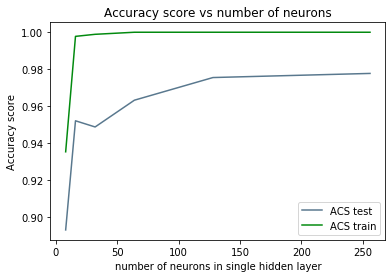

In [14]:
def get_train_and_test_acs_list(hidden_layer_neurons):
    test_acs_list = []
    train_acs_list = []
    for n in hidden_layer_neurons:
        mlp = MLPClassifier(hidden_layer_sizes=n, max_iter=200)
        test_acs, train_acs = train_and_test(df, target_labels, n)
        test_acs_list.append(test_acs)
        train_acs_list.append(train_acs)
    return test_acs_list, train_acs_list

test_acs_list, train_acs_list = get_train_and_test_acs_list(one_hl_neurons)
x = [i[0] for i in one_hl_neurons]

# Plot the resulting classification accuracies.
plt.plot(x, test_acs_list, color='#59788E', label='ACS test')
plt.plot(x, train_acs_list, color='#028A0F', label='ACS train')
plt.legend()
plt.title('Accuracy score vs number of neurons')
plt.xlabel('number of neurons in single hidden layer')
plt.ylabel('Accuracy score')
plt.show()

If the train score is much higher than the test score, then we are probably overfitting. It appears that the gap between the test score and the train score decreases when we increase the number of neurons in the single hidden layer. Let's explore how introducing a second hidden layer affects the results of the model.

## 5. Neural Network with Two Hidden Layers

We modify the above piece of code to perform a 4-fold cross validation, and train a neural network model with two hidden layers:
- `n` neurons in the first hidden layer;
- `n` neurons in the second hidden layer;

where `n` goes from 8 to 256.

In [15]:
two_hl_neurons = [(8,8), (16,16), (32,32), (64,64), (128,128), (256,256)]

two_hl_avg_acs_list = get_mlp_avg_acs_list(two_hl_neurons, kf)
x = [i[0] for i in two_hl_neurons]

(8, 8)


/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

(16, 16)


/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

(32, 32)
(64, 64)
(128, 128)
(256, 256)


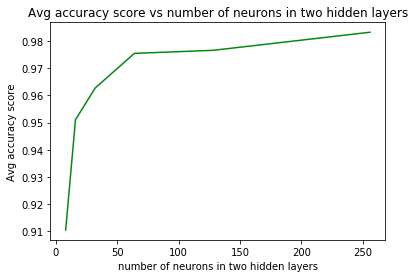

['0.9104', '0.9510', '0.9627', '0.9755', '0.9766', '0.9833']
Best accuracy score: 0.9833


In [16]:
# Plot the resulting classification accuracies.
plt.plot(x, two_hl_avg_acs_list, color='#028A0F')
plt.title('Avg accuracy score vs number of neurons in two hidden layers')
plt.xlabel('number of neurons in two hidden layers')
plt.ylabel('Avg accuracy score')
plt.show()

# Print the formatted list of average accuracy scores, and the best accuracy score.
print(list(map(lambda x: "{:.4f}".format(x), two_hl_avg_acs_list)))
print("Best accuracy score:", "{:.4f}".format(np.max(two_hl_avg_acs_list)))

In order to detect overfitting, we can still perform a simple train/test validation and compute the accuracy scores for both the test and the train sets. As before, if the train score is much higher than the test score, then the model is probably overfitting the data.

/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neurons: 8, ACS test: 0.7419, ACS train: 0.7806


/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neurons: 16, ACS test: 0.9455, ACS train: 0.9989


/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neurons: 32, ACS test: 0.9566, ACS train: 1.0000
Neurons: 64, ACS test: 0.9766, ACS train: 1.0000
Neurons: 128, ACS test: 0.9733, ACS train: 1.0000
Neurons: 256, ACS test: 0.9811, ACS train: 1.0000


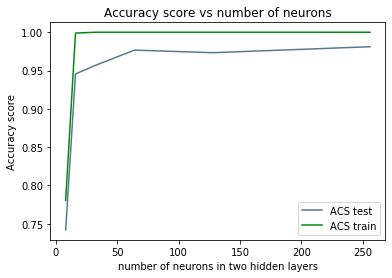

In [17]:
test_acs_list, train_acs_list = get_train_and_test_acs_list(two_hl_neurons)
x = [i[0] for i in two_hl_neurons]

# Plot the resulting classification accuracies.
plt.plot(x, test_acs_list, color='#59788E', label='ACS test')
plt.plot(x, train_acs_list, color='#028A0F', label='ACS train')
plt.legend()
plt.title('Accuracy score vs number of neurons')
plt.xlabel('number of neurons in two hidden layers')
plt.ylabel('Accuracy score')
plt.show()

It seems that introducing a second hidden layer helped to decrease the gap between the test score and the train score (i.e., it helped to reduce overfitting). Let's try to see if the model can benefit from introducing a third hidden layer.

## 6. Neural Network with Three Hidden Layers
It is known that the amount of overfitting increases when we use more hidden layers. To help us prevent overfitting, let's increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers.

We train a neural network model using 3 hidden layers with:
- `n` neurons in the first hidden layer;
- `n` neurons in the second hidden layer;
- `n` neurons in the third hidden layer;

where `n` goes from 8 to 256.

In [18]:
# Perform 6-fold cross validation:
kf6 = KFold(n_splits=6, shuffle=True, random_state=1)

three_hl_neurons = [(8,8,8), (16,16,16), (32,32,32), (64,64,64), (128,128,128), (256,256,256)]

three_hl_avg_acs_list = get_mlp_avg_acs_list(three_hl_neurons, kf6)
x = [i[0] for i in three_hl_neurons]

(8, 8, 8)


/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

(16, 16, 16)


/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(32, 32, 32)
(64, 64, 64)
(128, 128, 128)
(256, 256, 256)


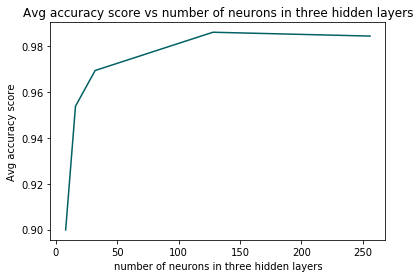

['0.8998', '0.9538', '0.9694', '0.9750', '0.9861', '0.9844']
Best accuracy score: 0.9861


In [21]:
# Plot the resulting classification accuracies.
plt.plot(x, three_hl_avg_acs_list, color='#016064')
plt.title('Avg accuracy score vs number of neurons in three hidden layers')
plt.xlabel('number of neurons in three hidden layers')
plt.ylabel('Avg accuracy score')
plt.show()

# Print the formatted list of average accuracy scores, and the best accuracy score.
print(list(map(lambda x: "{:.4f}".format(x), three_hl_avg_acs_list)))
print("Best accuracy score:", "{:.4f}".format(np.max(three_hl_avg_acs_list)))

/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neurons: 8, ACS test: 0.8888, ACS train: 0.9532


/home/marco/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neurons: 16, ACS test: 0.9366, ACS train: 1.0000
Neurons: 32, ACS test: 0.9466, ACS train: 1.0000
Neurons: 64, ACS test: 0.9622, ACS train: 1.0000
Neurons: 128, ACS test: 0.9722, ACS train: 1.0000
Neurons: 256, ACS test: 0.9789, ACS train: 1.0000


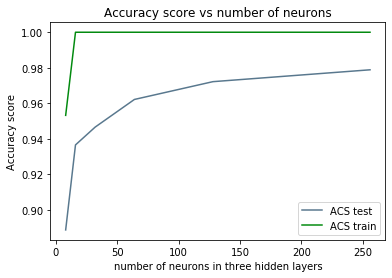

In [20]:
test_acs_list, train_acs_list = get_train_and_test_acs_list(three_hl_neurons)
x = [i[0] for i in three_hl_neurons]

# Plot the resulting classification accuracies.
plt.plot(x, test_acs_list, color='#59788E', label='ACS test')
plt.plot(x, train_acs_list, color='#028A0F', label='ACS train')
plt.legend()
plt.title('Accuracy score vs number of neurons')
plt.xlabel('number of neurons in three hidden layers')
plt.ylabel('Accuracy score')
plt.show()

It appears that the model does not benefit from introducing a third hidden layer; on the contrary, the amount of overfitting increases. This is a known effect.